# <span style="color:gray">ML_Session_4주차_과제</span>  

In [1]:
import pandas as pd
from pandas import DataFrame, Series

import numpy as np
import os

# sklearn
import sklearn

import warnings
warnings.filterwarnings(action='ignore') 

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 

# 01. SVM (총 25점)

### 01-1) SVM은 어떤 모델이고, 어떤 아이디어를 사용하나요? (5점)

In [4]:
# 답)  
print("SVM: 선형 분류, 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신 러닝 모델, 클래스가 다른 데이터들을 가장 큰 마진(margin)으로 분리해내는 선 또는 면을 찾아내는 것")
print("기본 아이디어 : 클래스 사이에 가장 폭 넓은 도로를 찾는 것")

SVM: 선형 분류, 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신 러닝 모델, 클래스가 다른 데이터들을 가장 큰 마진(margin)으로 분리해내는 선 또는 면을 찾아내는 것
기본 아이디어 : 클래스 사이에 가장 폭 넓은 도로를 찾는 것


### 01-2) SVM모델을 불러오고, (데이터)에 적용해보세요. (총 8점)

X_train, X_test, y_train, y_test로 X와y를 분리하세요.  
test_size는 0.3, random_state는 42로 설정해주세요.  
모델은 Pipeline을 사용해서 StandardScaler도 같이 사용한 경우와 안사용했을 경우도 해보세요~  

fit할 때, X_train,y_train 사용하시고, Acuuracy 점수 낼 때는 X_test와 y_test를 사용해주세요  

In [58]:
#(총 8점)
# data import
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# data 불러오기
wine=load_wine()
X, y = wine.data, wine.target

# X, y 분류 (3점)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# 적용 (4점)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures


svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, random_state=42)),
    ])

svm_clf.fit(X_train, y_train).predict(X_test)

svm_clf_0 = Pipeline([
        ("linear_svc", LinearSVC(C=100, loss="hinge", random_state=42)),
    ])

svm_clf_0.fit(X_train, y_train).predict(X_test)

svm_clf_Poly = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf_Poly.fit(X_train, y_train).predict(X_test)

svm_clf_kernel = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=100000, coef0=1, C=100)),
    ])

svm_clf_kernel.fit(X_train, y_train).predict(X_test)

# predict (1점)
print('Accuracy = ', svm_clf.score(X_test, y_test))
print('Accuracy = ', svm_clf_0.score(X_test, y_test))
print('Accuracy = ', svm_clf_Poly.score(X_test, y_test))
print('Accuracy = ', svm_clf_kernel.score(X_test, y_test))


Accuracy =  0.9814814814814815
Accuracy =  0.7037037037037037
Accuracy =  0.9814814814814815
Accuracy =  0.25925925925925924


### 01-3) 파라미터를 조정해보고, 조정했을 때 어떻게 달라지는지 알아보세요. (3가지 이상 해보세요~) (12점)

In [61]:
print("C값은 변화를 주어도 스코어에 큰 차이가 없었다. 스케일링은 왠만하면 해주는 편이 스코어가 좋았다. 커널을 폴리로 두고 여러 파라미터값을 조정해보았을때 가장 좋은 성능을 내는 파라미터 값을 찾는 것이 쟁점이었다.")

C값은 변화를 주어도 스코어에 큰 차이가 없었다. 스케일링은 왠만하면 해주는 편이 스코어가 좋았다. 커널을 폴리로 두고 여러 파라미터값을 조정해보았을때 가장 좋은 성능을 내는 파라미터 값을 찾는 것이 쟁점이었다.


---

# 02. Naive Bayes (총 7점)

### 02-1) Naive Bayes는 어떤 모델인가요? (5점)

In [64]:
# 답)  
print("특성들 사이의 독립을 가정하는 'Bayes 정리'를 적용한 확률 분류기의 일종")

특성들 사이의 독립을 가정하는 'Bayes 정리'를 적용한 확률 분류기의 일종


### 02-2) Naive Bayes가 많이 사용되는 분야는 어디인가요? (2점)

In [65]:
# 답)  
print("단순화 시켜 쉽고 빠르게 판단을 내릴 때 주로 사용됨. Ex) 문서 분류, 질병 진단, 스팸 메일 분류 등에 많이 사용")

단순화 시켜 쉽고 빠르게 판단을 내릴 때 주로 사용됨. Ex) 문서 분류, 질병 진단, 스팸 메일 분류 등에 많이 사용


---

# 03. KNN (총 34점)

### 03-1) KNN은 어떤 모델인가요? (5점)

In [66]:
# 답)  
print("새로운 데이터가 주어지면 가장 가까운 k개 이웃의 데이터를 살펴본 뒤, 더 많은 데이터가 포함되어 있는 범주로 데이터를 예측하는 방식")

새로운 데이터가 주어지면 가장 가까운 k개 이웃의 데이터를 살펴본 뒤, 더 많은 데이터가 포함되어 있는 범주로 데이터를 예측하는 방식


### 03-2) 파라미터 n_neighbors를 작게할 경우와 많이 크게할 경우 어떤 차이점이 있나요? (3점)

In [67]:
# 답)  
print("너무 작게하면 오버피팅 크게하면 언더피팅이 발생할 수 있다.")

너무 작게하면 오버피팅 크게하면 언더피팅이 발생할 수 있다.


### 03-3) 유클리드 거리를 사용하려면 파라미터를 어떻게 설정해야되나요? (3점)

In [68]:
# 답)  
print("p값을 2로 한다")

p값을 2로 한다


### 03-4) 맨하튼 거리를 사용하려면 파라미터를 어떻게 설정해야되나요? (3점)

In [69]:
# 답)  
print("p값을 1로 한다")

p값을 1로 한다


### 03-5) KNN모델을 불러오고, (데이터)에 적용해보세요. (총 8점)

X_train, X_test, y_train, y_test로 X와y를 분리하세요.  
test_size는 0.3, random_state는 42로 설정해주세요.  
모델은 Pipeline을 사용해서 StandardScaler도 같이 사용한 경우와 안사용했을 경우도 해보세요~  

fit할 때, X_train,y_train 사용하시고, Acuuracy 점수 낼 때는 X_test와 y_test를 사용해주세요  

In [82]:
#(총 8점)
# data import
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier


# data 불러오기
digits=load_digits()
X, y = digits.data, digits.target

# X, y 분류 (3점)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# 적용 (4점)
knn = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=10, weights='distance', p=2)),
    ])

knn.fit(X_train, y_train).predict(X_test)

# predict (1점)
print('Accuracy = ', knn.score(X_test, y_test))

Accuracy =  0.9740740740740741


### 03-6) 파라미터를 조정해보고, 조정했을 때 어떻게 달라지는지 알아보세요. (12점)

In [83]:
# 파라미터를 변경해보세요~ (3가지 이상 해보세요~)
print("n값이 과도하게 커지면 에러가 나고 uniform과 distance의 차이는 크게 없었다. p가 1일때와 2일때도 차이가 크게 없었다.")

n값이 과도하게 커지면 에러가 나고 uniform과 distance의 차이는 크게 없었다. p가 1일때와 2일때도 차이가 크게 없었다.


---

# 04. Decision Tree (총 34점)

### 04-1) Decision Tree는 어떤 모델인가요? (5점)

In [84]:
# 답)  
print("특정 규칙에 따라서 레이블을 분류하는 모델 데이터의 어떤 기준을 바탕으로 규칙을 만드느냐가 성능을 결정하는 중요한 요소 분류와 회귀, 다중 출력이 가능한 머신 러닝 알고리즘")

특정 규칙에 따라서 레이블을 분류하는 모델 데이터의 어떤 기준을 바탕으로 규칙을 만드느냐가 성능을 결정하는 중요한 요소 분류와 회귀, 다중 출력이 가능한 머신 러닝 알고리즘


### 04-2) 아래 그림의 빈칸을 채우세요. (각 1점)

<img src='http://drive.google.com/uc?export=view&id=1romkz8fVQ5Hg5rwCiWlrTqgUIa4GxS_X' /><br>

In [ ]:
# 답)  

# 1)  Root node
# 2)  Branch
# 3)  Parent node
# 4)  Leaf node

### 04-3) DT모델을 불러오고, (데이터)에 적용해보세요. (총 13점)

#### 데이터를 불러온 뒤, X와y를 설정하고, test_size를 0.3으로 random_state는 42로 설정해서 train과 test로 나눠보세요
#### random_state를 0으로 한 경우와 다양하게 파라미터를 변경해보고, tree를 시각화했을 때 변하는 것이 있는지 확인해보세요

plot_tree(모델이름, feature_names = explt_vars, class_names = fct_val, filled = True) 을 사용해서 시각화해보세요  
ROC_AUC와 Accuarcy 점수를 구해보세요  

In [85]:
# 사용한 데이터 : breast_cancer dataset
from sklearn.datasets import load_breast_cancer

breast_cancer=load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

explt_vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error','concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture','worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points','worst symmetry', 'worst fractal dimension']
fct_val = {0: 'malignant', 1: 'benign'}

AUC =  0.958994708994709
Accuracy =  0.9649122807017544


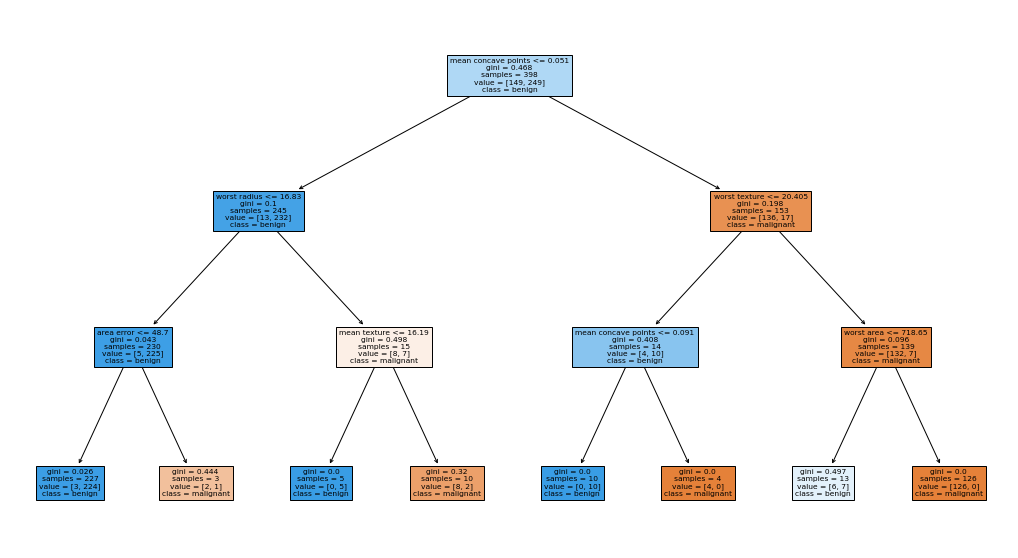

In [100]:
# (총 13점)
# X, y 분류 (3점)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# 적용 fit (4점)
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
pred = tree_clf.fit(X_train, y_train).predict(X_test)

# predict (2점)
from sklearn.metrics import roc_auc_score

print('AUC = ', roc_auc_score(y_test, pred))
print('Accuracy = ', tree_clf.score(X_test, y_test))

# tree 시각화 (4점)
from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(tree_clf, feature_names = explt_vars, class_names = fct_val, filled = True)

plt.show()

### 04-4) 파라미터를 조정해보고, 조정했을 때 어떻게 달라지는지 알아보세요. (12점)
각 파라미터가 어떤 역할을 하는지 간단하게 설명도 해주세요

In [ ]:
# 파라미터를 변경해보세요~ (3가지 이상 해보세요~) (12점)
max_depth : int, default=None
최대 깊이 지정

min_samples_split : int or float, default=2
분할되기 위해 노드가 가져야 하는 최고 샘플 수

min_samples_leaf : int or float, default=1
리프 노드가 가지고 있어야 할 최소 샘플 수

max_features : int, float or {"auto", "sqrt", "log2"}, default=None
각 노드에서 분할에 사용할 feature의 최대 수

max_leaf_nodes : int, default=None
리프 노드의 최대수